In [1]:
# page 365 - TensorFlow single convolutional layer, load images
        import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_image
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
# page 365 (continued) - Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
print(flower.shape)
dataset = np.array([china,flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape
print(dataset.shape)

(427, 640, 3)
(2, 427, 640, 3)


/home/chris/Documents/projects_scikit_tensorflow/env/local/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/chris/Documents/projects_scikit_tensorflow/env/local/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/chris/Documents/projects_scikit_tensorflow/env/local/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/chris/Documents/projects_scikit_tensorfl

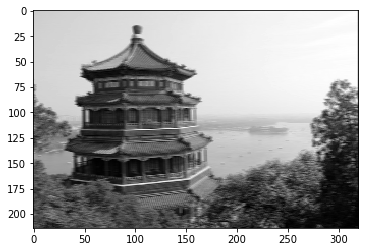

In [5]:
# page 365 (continued) - Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
x = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(x, filters, strides=[1,2,2,1], padding='SAME')

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={x: dataset})
    
plt.imshow(output[0, :, :, 1], cmap='gray')  # plot 1st image's second feature map
plt.show()

In [13]:
# page 366 - using tf.layers.conv2d() to create the filters variable and bias 

# Create 2d convolutional layer with two 7x7 feature maps using 2x2 strides and "SAME" padding
                                                                                                                                                                                                                                                                                                
x = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(x, filters=2, kernel_size=7, strides=[2,2], padding="SAME")


(427, 640, 3)
(213, 320, 3)


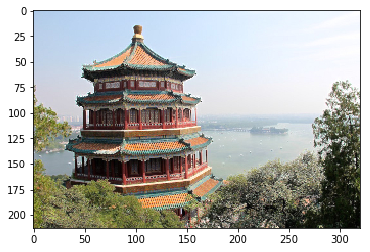

In [10]:
# page 368 - create a Max pooling layer
# create a graph with input X plus a max pooling layer
x = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

print(dataset[0].shape)
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={x: dataset})

print(output[0].shape)
plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()



In [15]:
# page 381 - exercise 8 (Inception v3)

from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

x = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="x")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
    x, num_classes=1001, is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()

### at this point to better understand Inception v3 I am
### going to another source (and moving to a different
### notebook... look for "inception" notebook)

In [ ]:
ss
